In [1]:
#Problem Statement
#Classifying mobile price into different price ranges based of features

import numpy as np
import pandas as pd

#Reading the data 
price=pd.read_csv("C:\\Users\\Teju\\Desktop\\Datatales\\Mobile Price Prediction\\train.csv")
price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
#Understanding the data 

price.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

In [3]:
#### Features Description

# battery_power:Total energy a battery can store in one time measured in mAh-
# blue:Has bluetooth or not
# clock_speed:speed at which microprocessor executes instructions
# dual_sim:Has dual sim support or not
# fc:Front Camera mega pixels
# four_g:Has 4G or not
# int_memory:Internal Memory in Gigabytes
# m_dep:Mobile Depth in cm
# mobile_wt:Weight of mobile phone
# n_cores:Number of cores of processor
# pc:Primary Camera mega pixels
# px_height:Pixel Resolution Height
# px_width:Pixel Resolution Width
# ram:Random Access Memory in Megabytes
# sc_h:Screen Height of mobile in cm
# sc_w:Screen Width of mobile in cm
# talk_time:longest time that a single battery charge will last when you are
# three_g:Has 3G or not
# touch_screen:Has touch screen or not
# wifi:Has wifi or not




In [4]:
#Target variable--price_range
# 0--> Low
# 3--> High
price['price_range'].value_counts()


3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [6]:
price.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
#Checking null values
price.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
#Outlier analysis 
cont=['battery_power','fc','n_cores','pc','sc_h','sc_w','talk_time','clock_speed', 'dual_sim',
      'int_memory', 'm_dep', 'mobile_wt', 'px_height', 'px_width','ram']
      
for i in cont:
      q75,q25=np.percentile(price.loc[:,i],[75,25])
      iqr=q75-q25
      min=q25-(iqr*1.5)
      max=q75+(iqr*1.5)
      print("Min value:",min)
      print("Max value:",max)
      print("")
      print('{var}-->{X} Outliers'.format(var=i,X=(price.loc[price.loc[:,i]<min,i].count()+price.loc[price.loc[:,i]>
                                        max,i].count())))


Min value: -293.5
Max value: 2760.5

battery_power-->0 Outliers
Min value: -8.0
Max value: 16.0

fc-->18 Outliers
Min value: -3.0
Max value: 13.0

n_cores-->0 Outliers
Min value: -10.0
Max value: 30.0

pc-->0 Outliers
Min value: -1.5
Max value: 26.5

sc_h-->0 Outliers
Min value: -8.5
Max value: 19.5

sc_w-->0 Outliers
Min value: -9.0
Max value: 31.0

talk_time-->0 Outliers
Min value: -1.5500000000000005
Max value: 4.450000000000001

clock_speed-->0 Outliers
Min value: -1.5
Max value: 2.5

dual_sim-->0 Outliers
Min value: -32.0
Max value: 96.0

int_memory-->0 Outliers
Min value: -0.7000000000000002
Max value: 1.7000000000000002

m_dep-->0 Outliers
Min value: 17.5
Max value: 261.5

mobile_wt-->0 Outliers
Min value: -714.0
Max value: 1944.0

px_height-->2 Outliers
Min value: -262.625
Max value: 2770.375

px_width-->0 Outliers
Min value: -1578.0
Max value: 5850.0

ram-->0 Outliers


In [9]:
#There are 2 outliers
price.shape

(2000, 21)

In [10]:
#Removing outliers
for i in cont:
    q1 = price.quantile(0.25)
    q3 = price.quantile(0.75)
    irq = q3 - q1
    price2 = price[~((price < (q1 - 1.5 * iqr)) |(price > (q3 + 1.5 * irq))).any(axis=1)]
price2.shape

(1980, 21)

In [11]:
#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [12]:
#Converting Categorical Data to Object Type

cat_columns=['blue','dual_sim','four_g','three_g','touch_screen', 'wifi', 'price_range']
price[cat_columns]=price[cat_columns].astype('object')
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null object
clock_speed      2000 non-null float64
dual_sim         2000 non-null object
fc               2000 non-null int64
four_g           2000 non-null object
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null object
touch_screen     2000 non-null object
wifi             2000 non-null object
price_range      2000 non-null object
dtypes: float64(2), int64(12), object(7)
memory usage: 328.2+ KB


In [57]:
##Univariate Analysis

def visualize_plot(df,tgt_col,object_mode=True):
    n=0
    this=[]
    if object_mode:
        n_rows=2
        n_cols=3
        width=20
        height=10
    
    else:
        n_rows=7
        n_cols=2
        width=20
        height=30
    
    
    for column in df.columns:
        if object_mode:
            if(df[column].dtypes=='O'):
                this.append(column)
        else:
            if(df[column].dtypes!='O')&(column!=tgt_col):
                this.append(column)
    
    fig,ax=plt.subplots(n_rows,n_cols,sharex=False,sharey=False,figsize=(width,height))
    for row in range(n_rows):
        for col in range(n_cols):
            if object_mode:
                g=sns.countplot(df[this[n]],ax=ax[row][col])
            else:
                g=sns.distplot(df[this[n]],ax=ax[row][col])
                
            
            ax[row,col].set_title("Column Name:{}".format(this[n]))
            ax[row,col].set_xlabel("")
            ax[row,col].set_ylabel("")
            n+=1
    plt.show();

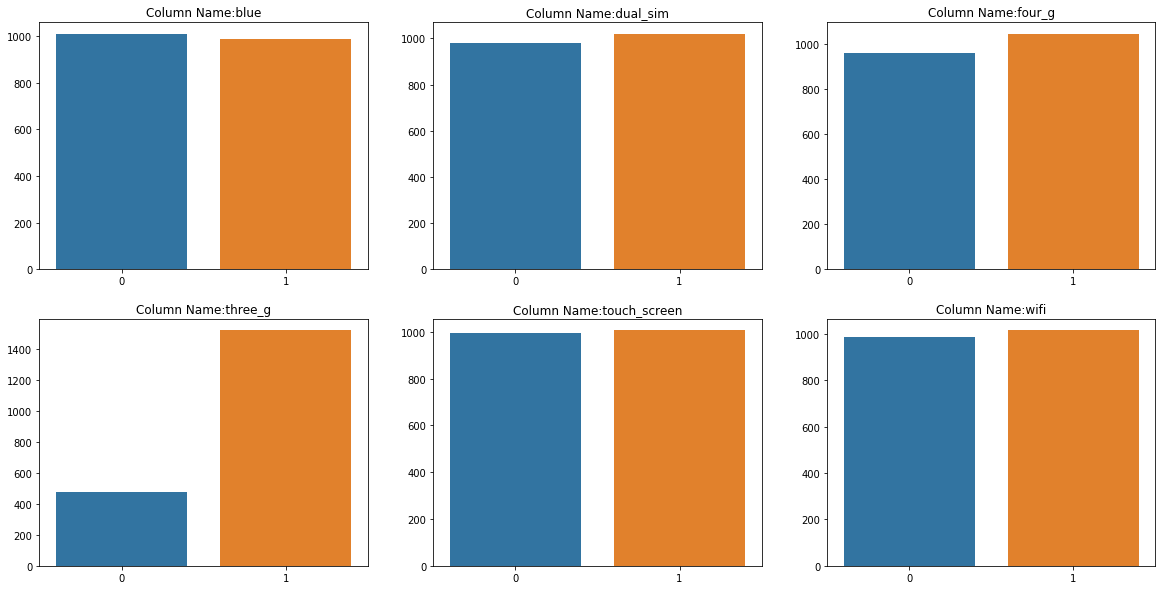

In [14]:
visualize_plot(price,'price_range',object_mode=True)

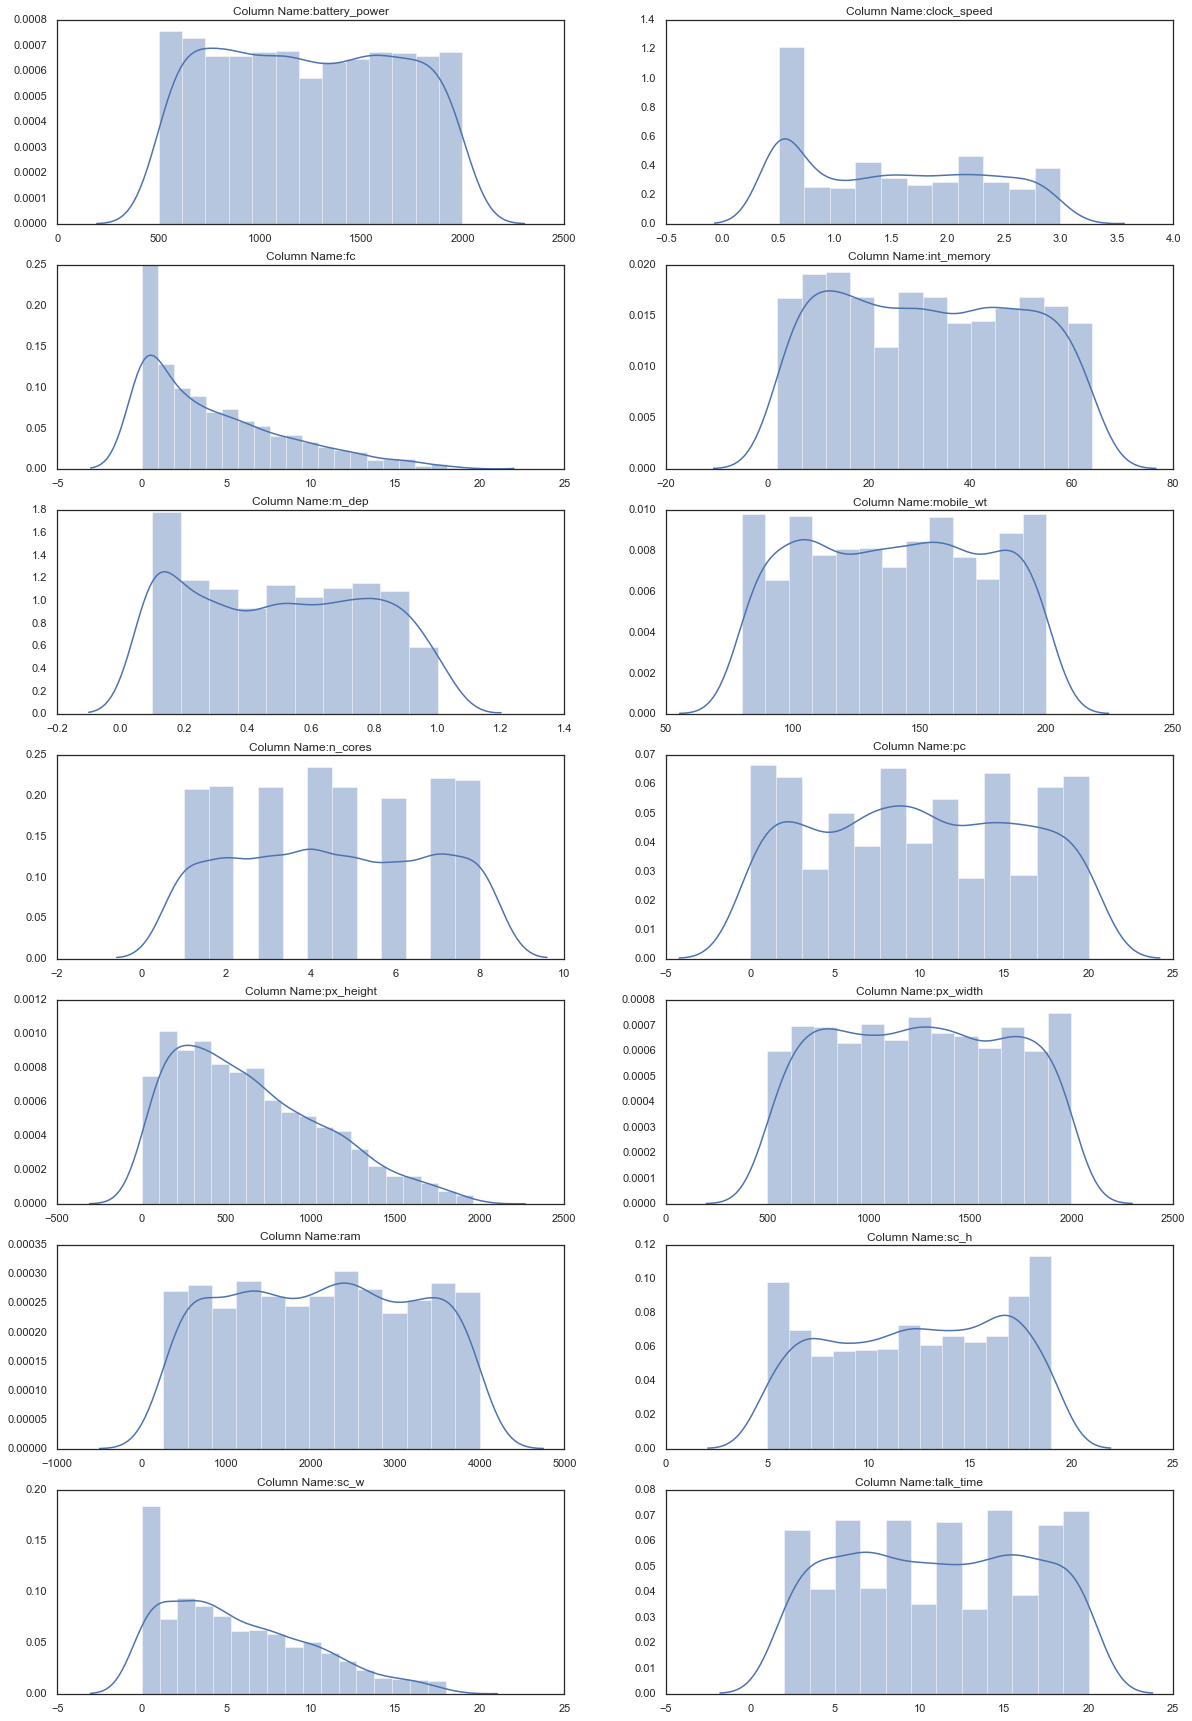

In [58]:
visualize_plot(price,'price_range',object_mode=False)

In [16]:
#Bivariate analysis

In [17]:
def bivariate(df,col1,col2):
    if col2=='price_range':
        cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x: x/x.sum()*100,axis=1)
    else:
        cross_name=pd.crosstab(df[col1],df[col2]).apply(lambda x: x/x.sum()*100,axis=0)
        
    cross_name.plot.bar()
    plt.xlabel('{}'.format(col1))
    plt.xticks(rotation=45)
    plt.ylabel('{}'.format(col2))
    plt.title('{} vs price'.format(col1))
    plt.figure(figsize=(16,12))
    plt.show()
    return cross_name
    

        

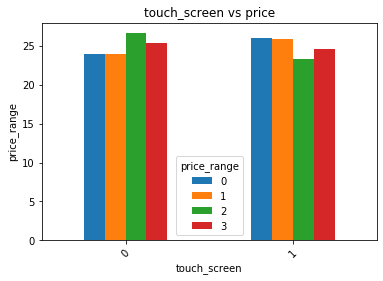

<Figure size 1152x864 with 0 Axes>

price_range,0,1,2,3
touch_screen,,,,
0,23.943662,24.044266,26.659960,25.352113
1,26.043738,25.944334,23.359841,24.652087


In [18]:
bivariate(price,'touch_screen','price_range')

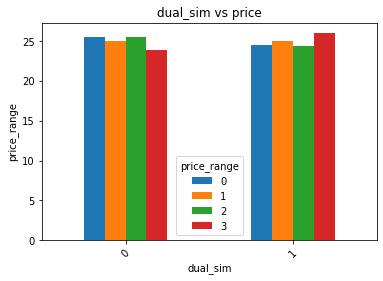

<Figure size 1152x864 with 0 Axes>

price_range,0,1,2,3
dual_sim,,,,
0,25.484200,24.974516,25.586137,23.955148
1,24.533857,25.024534,24.435721,26.005888


In [19]:
bivariate(price,'dual_sim','price_range')

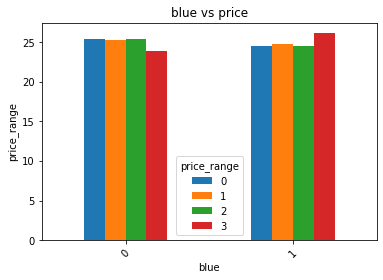

<Figure size 1152x864 with 0 Axes>

price_range,0,1,2,3
blue,,,,
0,25.445545,25.247525,25.445545,23.861386
1,24.545455,24.747475,24.545455,26.161616


In [20]:
bivariate(price,'blue','price_range')

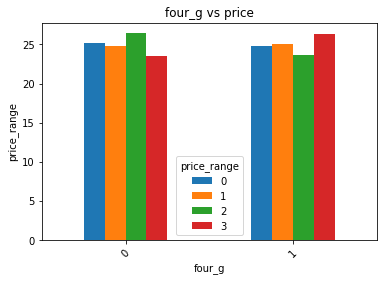

<Figure size 1152x864 with 0 Axes>

price_range,0,1,2,3
four_g,,,,
0,25.182863,24.869383,26.436782,23.510972
1,24.832215,25.119847,23.681687,26.366251


In [21]:
bivariate(price,'four_g','price_range')

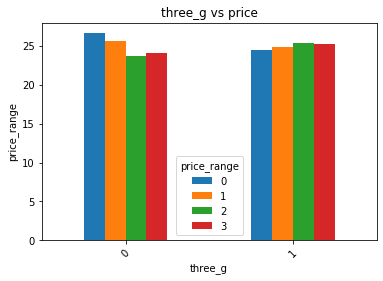

<Figure size 1152x864 with 0 Axes>

price_range,0,1,2,3
three_g,,,,
0,26.624738,25.576520,23.689727,24.109015
1,24.491136,24.819435,25.410374,25.279054


In [22]:
bivariate(price,'three_g','price_range')

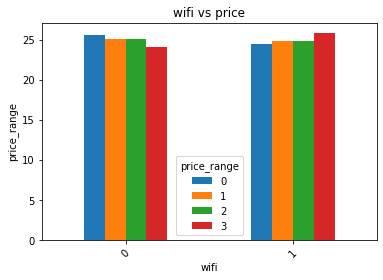

<Figure size 1152x864 with 0 Axes>

price_range,0,1,2,3
wifi,,,,
0,25.557809,25.152130,25.152130,24.137931
1,24.457594,24.852071,24.852071,25.838264


In [23]:
bivariate(price,'wifi','price_range')

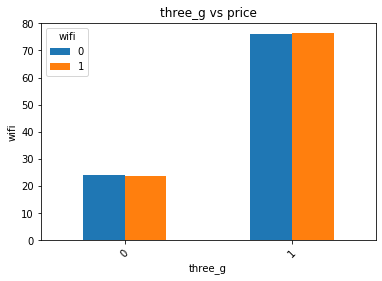

<Figure size 1152x864 with 0 Axes>

wifi,0,1
three_g,,
0,24.036511,23.668639
1,75.963489,76.331361


In [24]:
bivariate(price,'three_g','wifi')

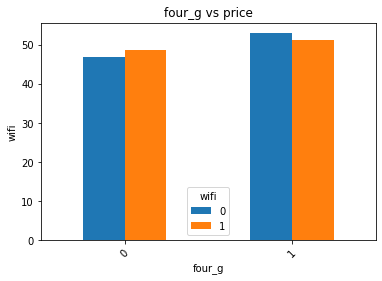

<Figure size 1152x864 with 0 Axes>

wifi,0,1
four_g,,
0,46.957404,48.717949
1,53.042596,51.282051


In [25]:
bivariate(price,'four_g','wifi')

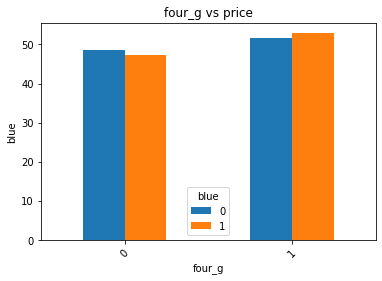

<Figure size 1152x864 with 0 Axes>

blue,0,1
four_g,,
0,48.514851,47.171717
1,51.485149,52.828283


In [26]:
bivariate(price,'four_g','blue')

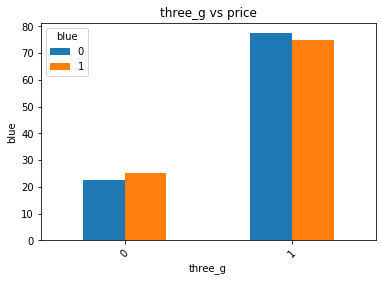

<Figure size 1152x864 with 0 Axes>

blue,0,1
three_g,,
0,22.574257,25.151515
1,77.425743,74.848485


In [27]:
bivariate(price,'three_g','blue')

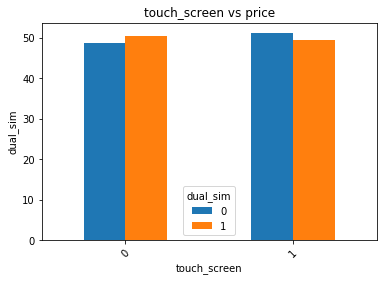

<Figure size 1152x864 with 0 Axes>

dual_sim,0,1
touch_screen,,
0,48.827727,50.539745
1,51.172273,49.460255


In [28]:
bivariate(price,'touch_screen','dual_sim')

In [29]:
#Finding disributions of continuous variables wrt target
#price_data_cont= price.select_dtypes(include=['float64', 'int64'])

price_cont=price.drop(['blue','dual_sim','four_g','three_g','touch_screen', 'wifi'],axis=1)

price_cont.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


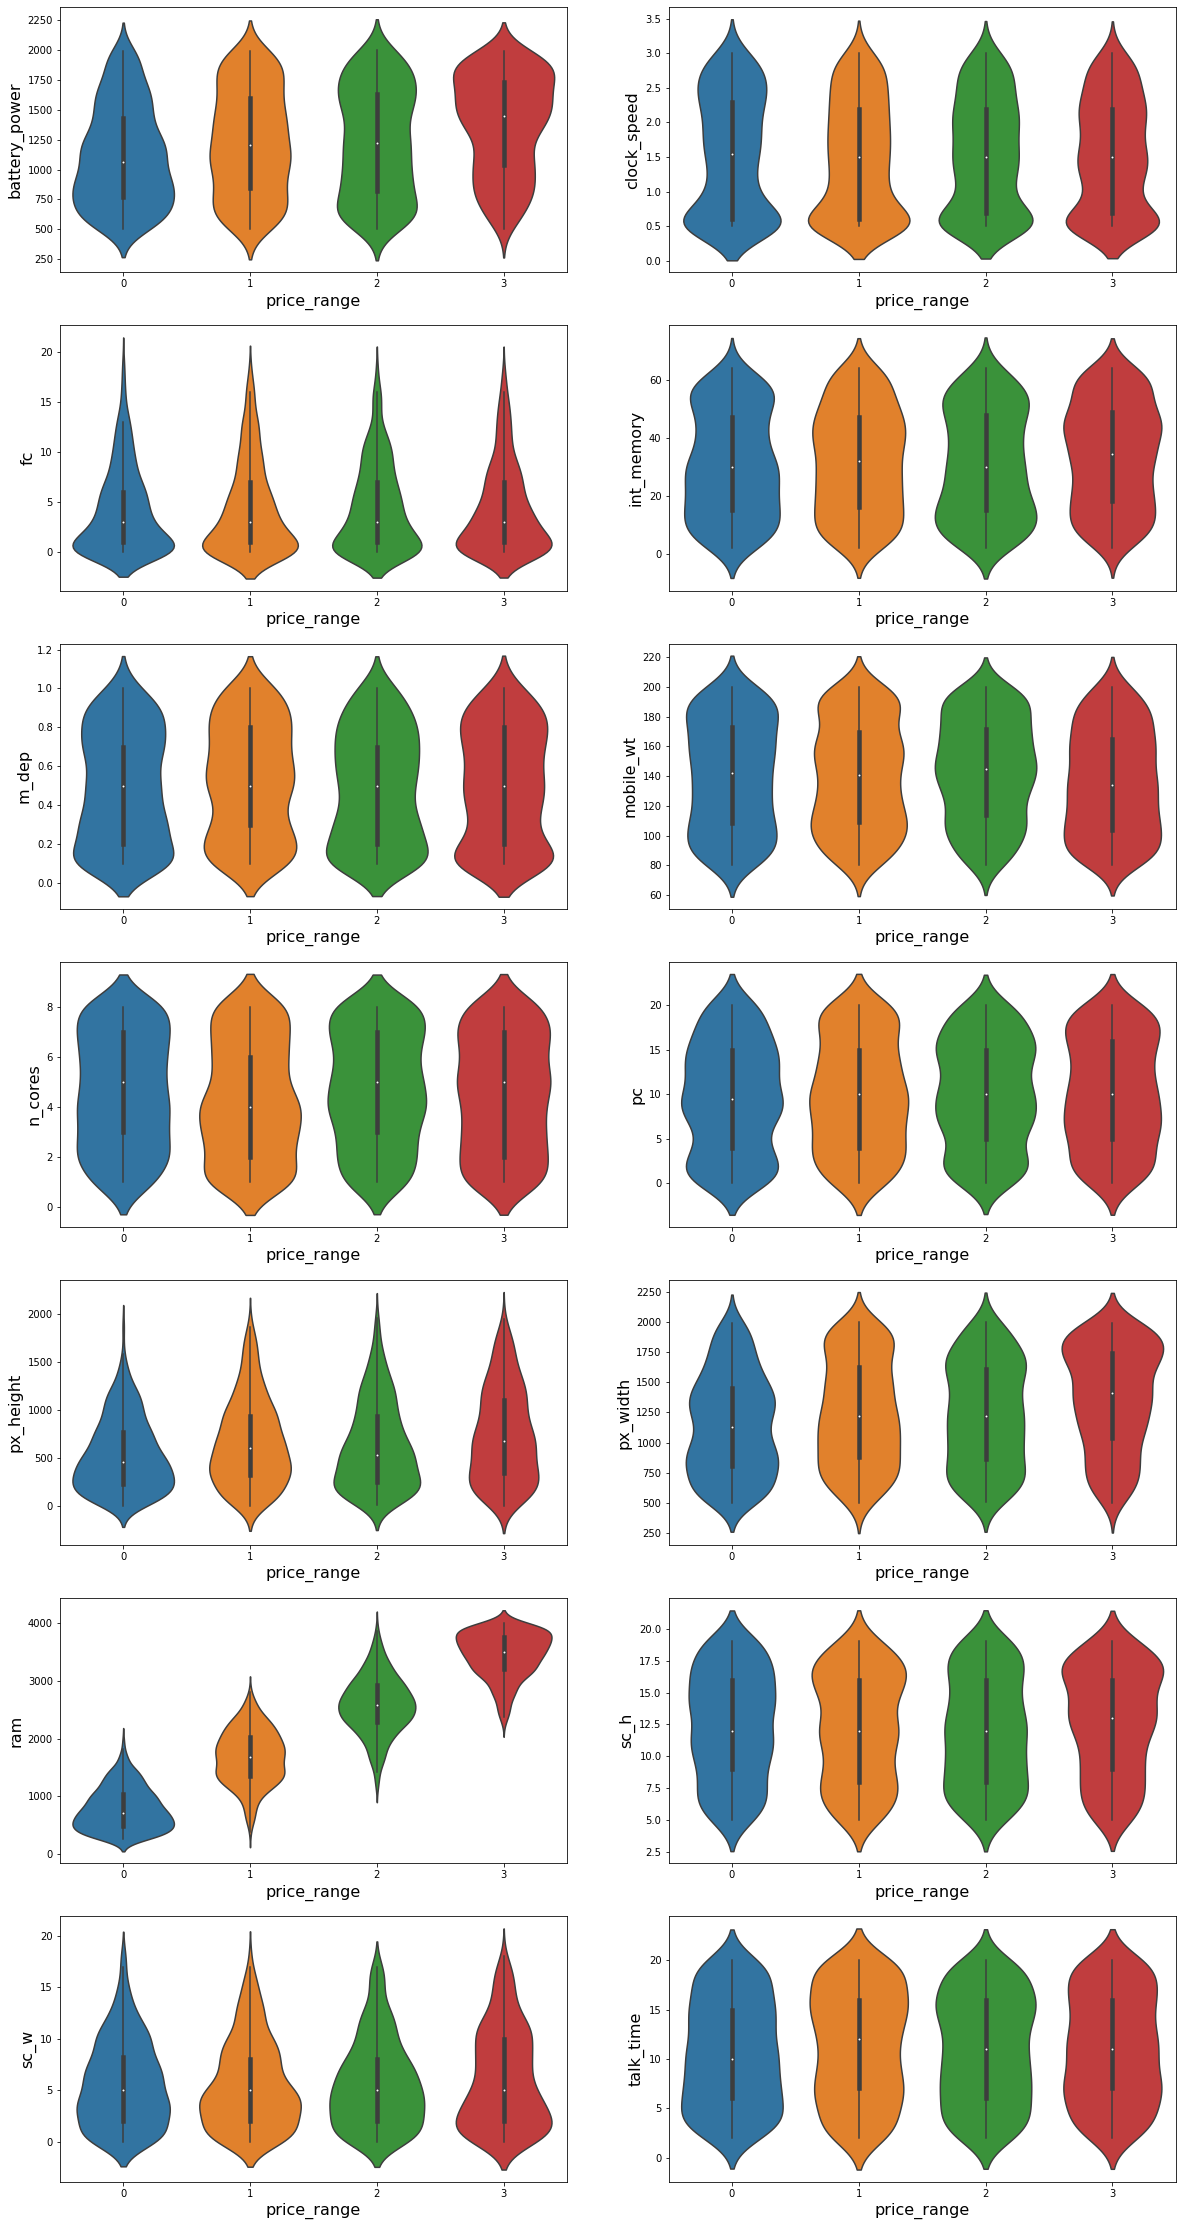

In [30]:
nrows=7
ncols=2
this=[]
n=0

for column in price_cont.columns:
    this.append(column)

fig,ax=plt.subplots(nrows,ncols,figsize=(20,40))
for row in range(nrows):
    for col in range(ncols):
        g=sns.violinplot(y=this[n],x='price_range',data= price_cont,ax=ax[row][col])
        
        ax[row][col].set_xlabel('price_range',fontsize=16)
        ax[row][col].set_ylabel(this[n],fontsize=16)
        n+=1


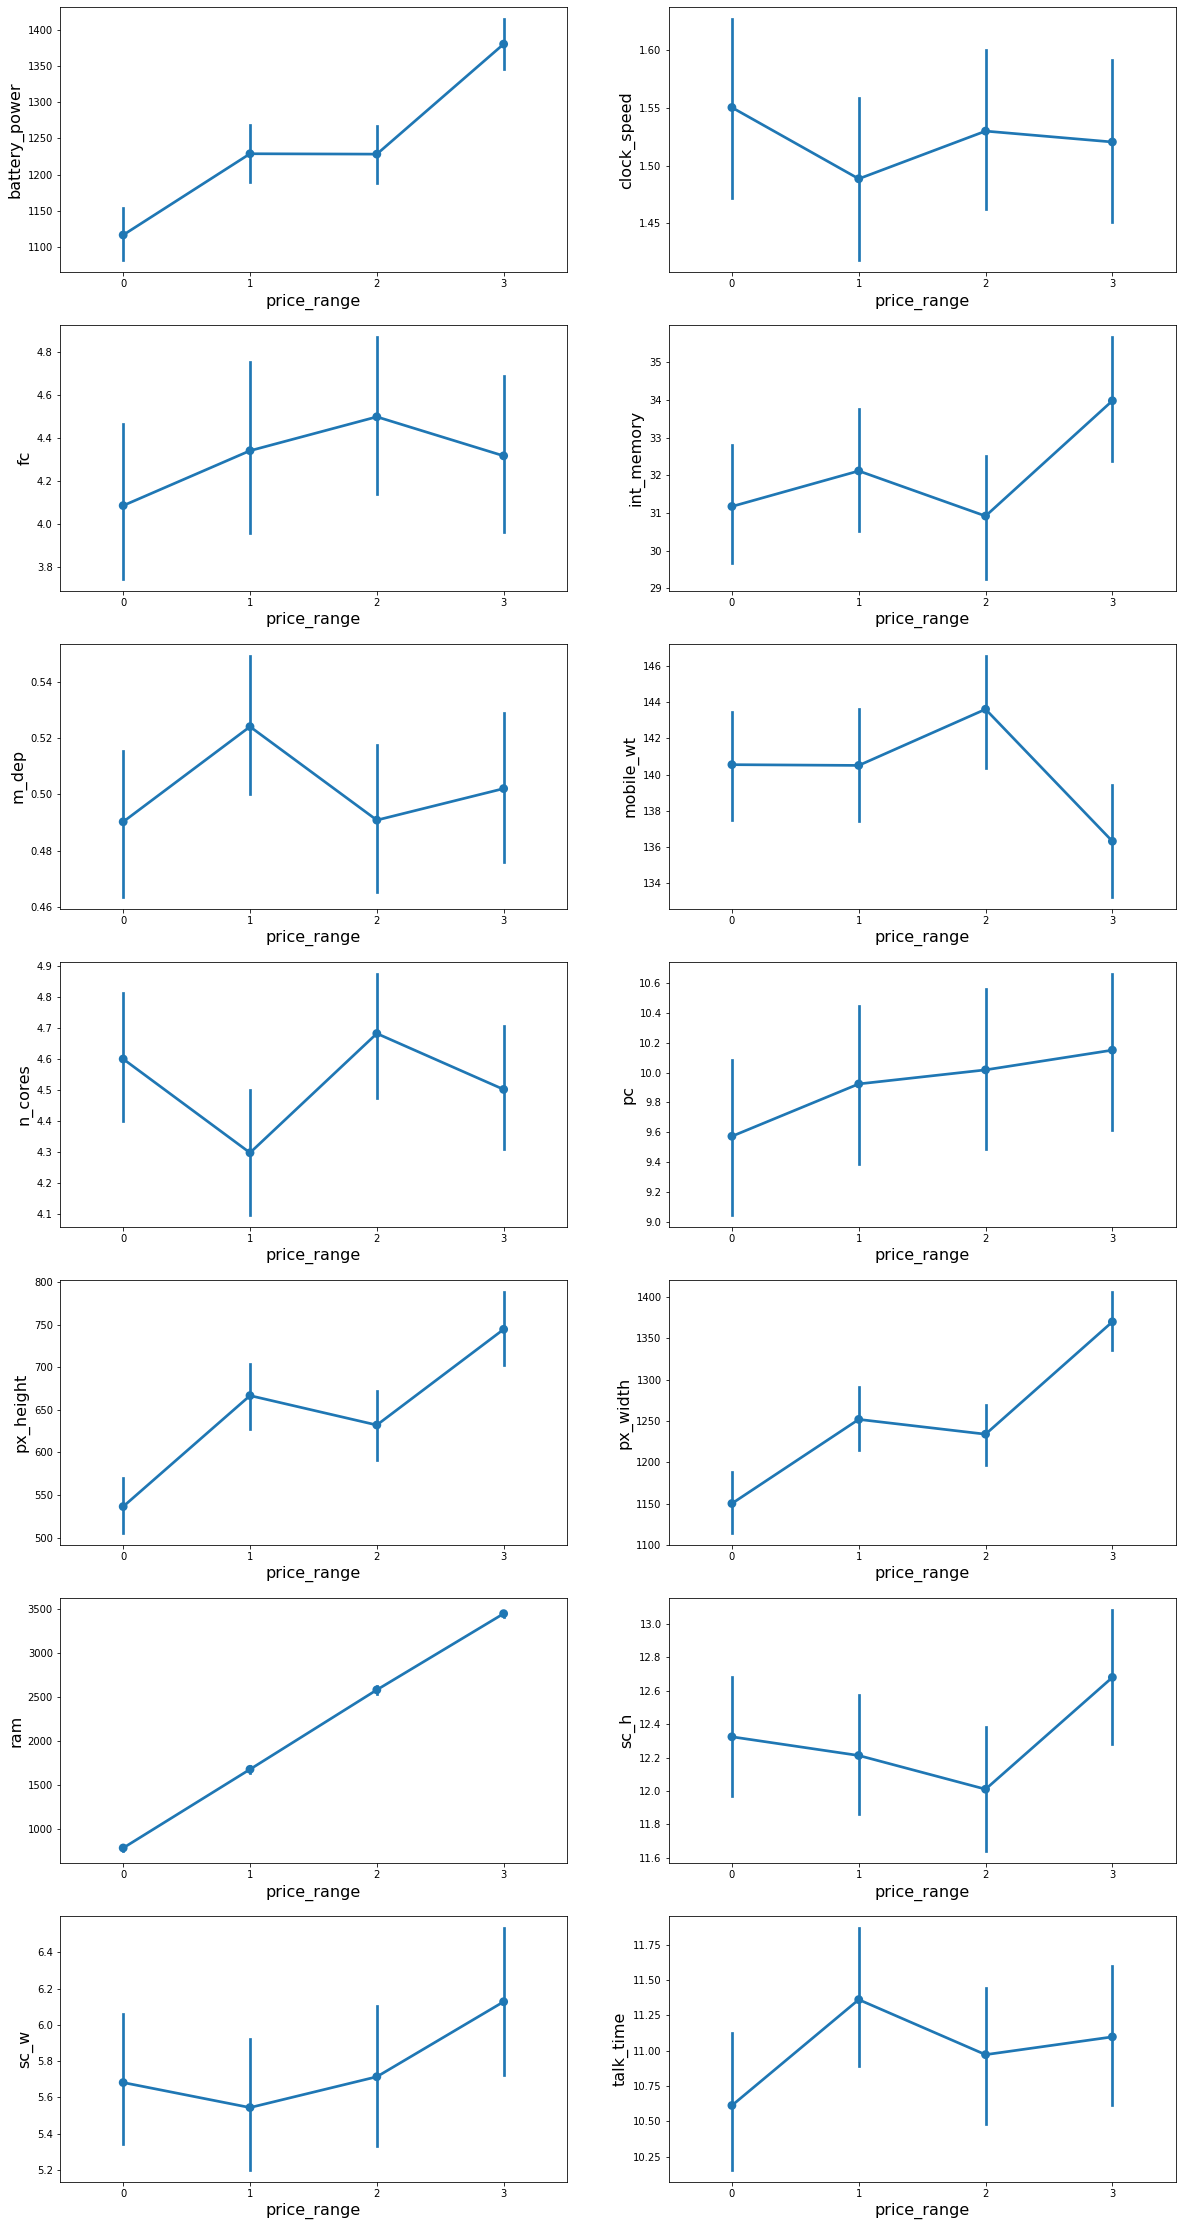

In [31]:
nrows=7
ncols=2
this=[]
n=0

for column in price_cont.columns:
    this.append(column)

fig,ax=plt.subplots(nrows,ncols,figsize=(20,40))
for row in range(nrows):
    for col in range(ncols):
        g=sns.pointplot(y=this[n],x='price_range',data= price_cont,ax=ax[row][col])
        
        ax[row][col].set_xlabel('price_range',fontsize=16)
        ax[row][col].set_ylabel(this[n],fontsize=16)
        n+=1

In [32]:
#Price Range '0'has less battery power and price range '3' has more battery power
#Internal memory is high in high price range
#Mobile depth and mobile weight is less in high price range 
#High pixel resolution for high price range
#Ram is high for high price range 


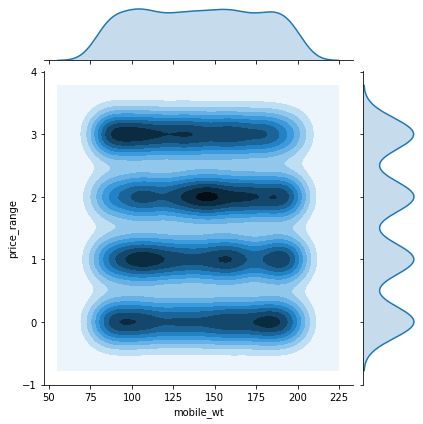

In [36]:
# Mobile Weight vs Price range
sns.jointplot(x='mobile_wt',y='price_range',data=price2,kind='kde');
#kernel density estimation

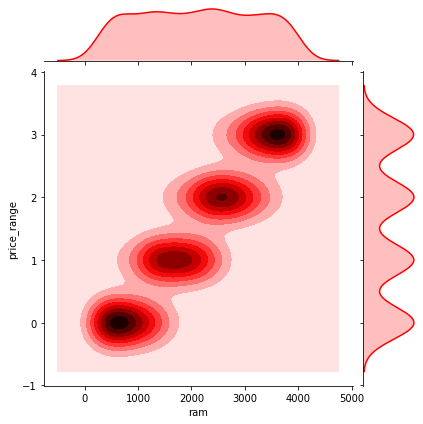

In [37]:
#Ram vs Price Range 
sns.jointplot(price2['ram'],price2['price_range'],data=price2,color='red',kind='kde')

In [38]:
#Ram for Single sim and Dual Sim

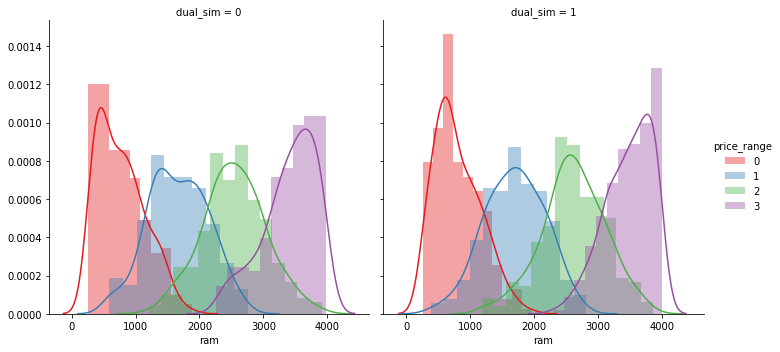

In [39]:
g = sns.FacetGrid(price, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [40]:
#Writing Function

def pricerange(m,x1,y1,y2):
    p= m.groupby(x1)[y1,y2].mean()
    p_df= pd.DataFrame(p)
    p_df= p_df.reset_index()
    p_df.plot(y=[y1, y2], x= x1, kind='bar', figsize=(12,8))
    plt.xlabel(x1 ,fontsize=12)
    plt.xticks(rotation=45)
    plt.ylabel(f"{y1} and {y2}",fontsize=12)
    plt.title(f"{x1} vs ({y1} & {y2})",fontsize=15)
    plt.show()

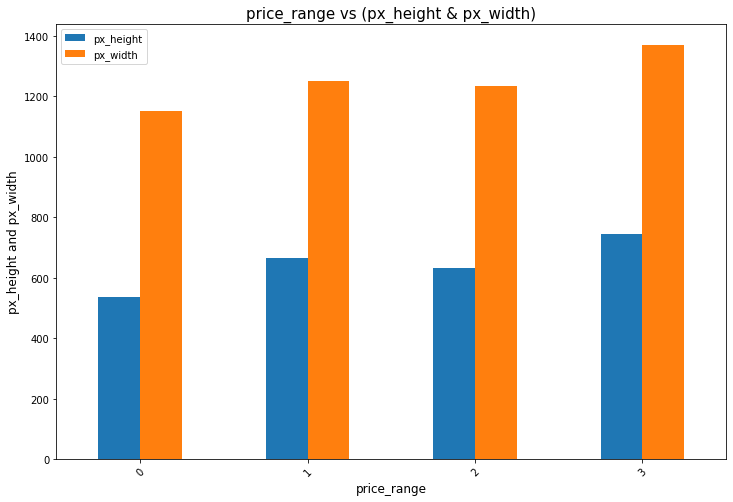

In [41]:
pricerange(price,'price_range','px_height','px_width')

In [42]:
# Statistical EDA
# Test of Independence

#Analysis of Categorical variables
#Chi square tests

catnames=['blue','dual_sim','four_g','three_g','touch_screen', 'wifi', 'price_range']
from scipy.stats import chi2_contingency
factors_paired=[(i,j) for i in catnames for j in catnames]
chi2, p_values = [],[]
for f in factors_paired:
    if f[0]!=f[1]:
        chitest=chi2_contingency(pd.crosstab(price2[f[0]],price2[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)


p1=np.array(p_values).reshape((7,7))
#p1=np.array(p_values)
p1=pd.DataFrame(p1.round(2), index=catnames, columns=catnames)
p1


,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
blue,0.00,0.15,0.61,0.20,0.75,0.42,0.81
dual_sim,0.15,0.00,0.95,0.58,0.53,0.30,0.75
four_g,0.61,0.95,0.00,0.00,0.40,0.36,0.28
three_g,0.20,0.58,0.00,0.00,0.51,0.99,0.69
touch_screen,0.75,0.53,0.40,0.51,0.00,0.65,0.26
wifi,0.42,0.30,0.36,0.99,0.65,0.00,0.85
price_range,0.81,0.75,0.28,0.69,0.26,0.85,0.00


In [43]:
# Null Hypothesis: Independant:(p value>0.05) # Accept Null Hypothesis 

# Alternate Hypothesis: Dependant:(p is <0.05) # Accept Alternate Hypothesis
p2= p1[p1<0.05]
p2


,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
blue,0.0,NaN,NaN,NaN,NaN,NaN,NaN
dual_sim,NaN,0.0,NaN,NaN,NaN,NaN,NaN
four_g,NaN,NaN,0.0,0.0,NaN,NaN,NaN
three_g,NaN,NaN,0.0,0.0,NaN,NaN,NaN
touch_screen,NaN,NaN,NaN,NaN,0.0,NaN,NaN
wifi,NaN,NaN,NaN,NaN,NaN,0.0,NaN
price_range,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [44]:
#Nan=Independant

#Getting Dependant
for i in p2.index:
    for j in p2.columns:
        if ~np.isnan(p2.loc[i,j]) and i!=j:
            print((i,j))

('four_g', 'three_g')
('three_g', 'four_g')


In [ ]:
#There is a relation between three g and four g 

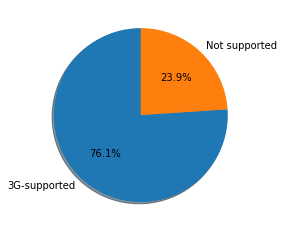

In [33]:
# % of phones which support 3G
labels = ["3G-supported",'Not supported']
values=price2['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

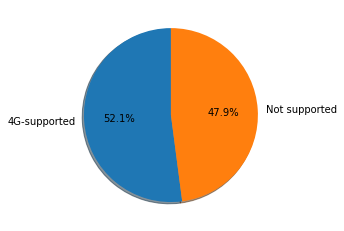

In [34]:
# % of phones which supports 4G
labels4g = ["4G-supported",'Not supported']
values4g = price2['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

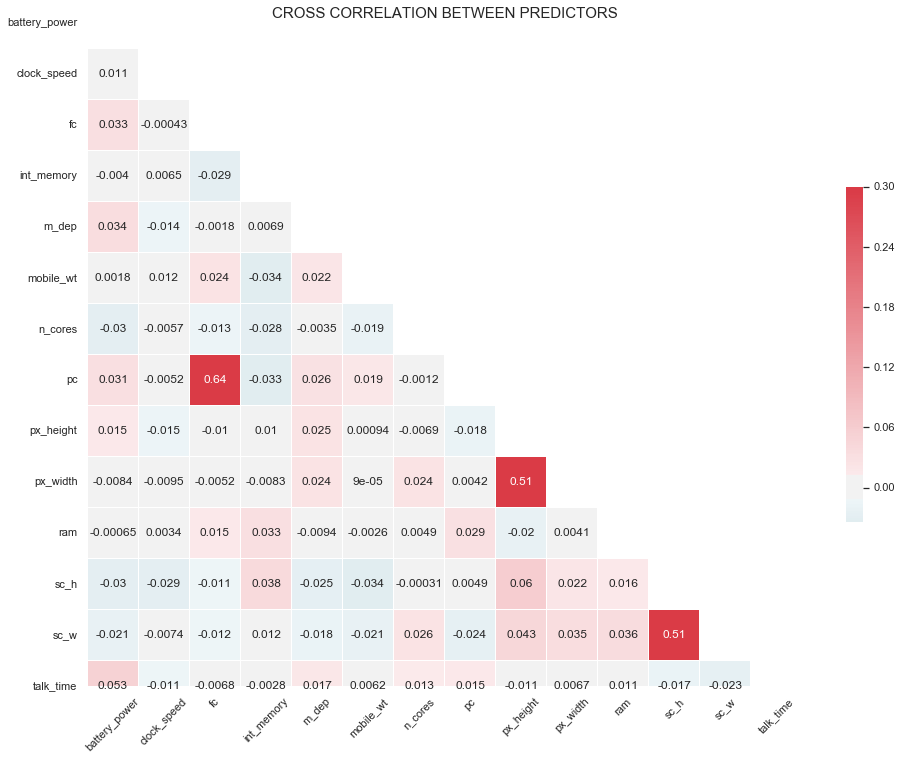

In [46]:
#correlation for continuos variables

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("CROSS CORRELATION BETWEEN PREDICTORS", fontsize=15)
plt.xticks(rotation= 45)
plt.show()

In [ ]:
#There exists correlation between 
#front camera megapixels, primary camera megapixels:
#Pixel ht, pixel width
#Screen ht, screen width

Text(0.5, 0, 'MegaPixels')

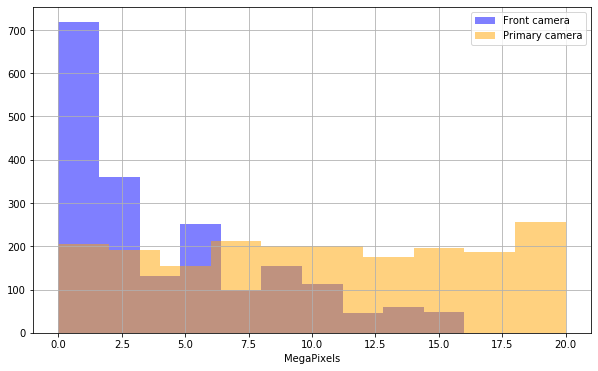

In [35]:
# No of Phones vs Camera megapixels of front and primary camera
plt.figure(figsize=(10,6))
price2['fc'].hist(alpha=0.5,color='blue',label='Front camera')
price2['pc'].hist(alpha=0.5,color='orange',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

Text(0.5, 0, 'Pixel Ht Vs Width')

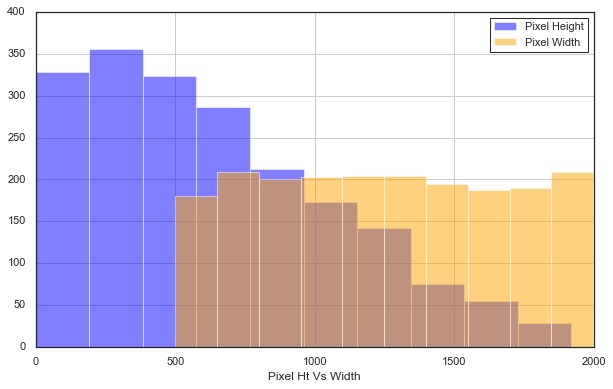

In [63]:
# Pixel Ht Vs Width
plt.figure(figsize=(10,6))
price2['px_height'].hist(alpha=0.5,color='blue',label='Pixel Height')
price2['px_width'].hist(alpha=0.5,color='orange',label='Pixel Width')
plt.legend()
plt.xlabel('Pixel Ht Vs Width')

Text(0.5, 0, 'Screen Ht Vs Width')

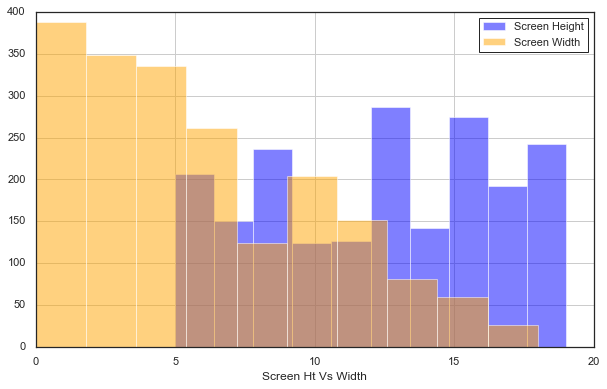

In [62]:
#Screen Ht Vs Width
plt.figure(figsize=(10,6))
price2['sc_h'].hist(alpha=0.5,color='blue',label='Screen Height')
price2['sc_w'].hist(alpha=0.5,color='orange',label='Screen Width')
plt.legend()
plt.xlabel('Screen Ht Vs Width')

In [47]:
#Building Model

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
from sklearn.model_selection import train_test_split


x=price2.drop(['price_range'],axis=1)
y=price2['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1) 
logmodel.fit(x_train,y_train)


#Training Accuracy
acc_log = round(logmodel.score(x_train, y_train)*100, 2)
print(round(acc_log,2,),"%")

c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


78.62 %


In [48]:
#Testing Accuracy
y_pred=logmodel.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc

0.7272727272727273

In [49]:
y_test[0:50]

1608    1
1776    2
721     3
109     3
354     2
87      3
1292    0
708     3
1259    1
225     3
1269    3
1557    2
977     0
1242    2
658     3
1963    1
1541    3
421     2
1673    1
679     0
1188    3
893     1
1207    0
642     0
1918    2
860     2
1210    2
1845    3
1890    1
1444    2
1853    0
460     2
375     2
1378    0
668     3
327     1
1765    2
1842    0
560     3
639     1
1677    2
1826    2
1777    1
1017    3
1605    2
379     3
769     1
315     3
307     2
895     3
Name: price_range, dtype: int64

In [50]:
y_pred[0:50]

array([1, 2, 3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 0, 2, 3, 2, 3, 3, 1, 0, 3, 1,
       0, 0, 3, 2, 3, 3, 1, 2, 0, 2, 2, 0, 3, 1, 3, 0, 3, 0, 2, 2, 1, 3,
       2, 3, 2, 3, 2, 3], dtype=int64)

In [51]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[164,  14,   2,   0],
       [ 32, 118,  44,   0],
       [  0,  53, 103,  63],
       [  0,   0,   8, 191]], dtype=int64)

In [52]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       180
           1       0.64      0.61      0.62       194
           2       0.66      0.47      0.55       219
           3       0.75      0.96      0.84       199

    accuracy                           0.73       792
   macro avg       0.72      0.74      0.72       792
weighted avg       0.72      0.73      0.71       792



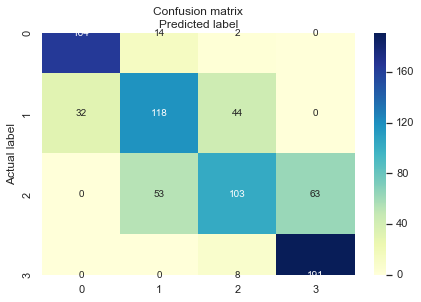

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [54]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label='positive',average='micro'))

Accuracy: 0.7272727272727273
Precision: 0.7272727272727273
Recall: 0.7272727272727273


c:\users\teju\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
